<a href="https://colab.research.google.com/github/mohamed-A-huss/Maids/blob/main/MaidaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
train_df = pd.read_csv('/content/train - train.csv')
test_df = pd.read_csv('/content/test - test.csv')

In [3]:
# Display the first few rows of the train dataset
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
# Display the first few rows of the test dataset
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#Step 1: Data Preparation and EDA

lets check if the data is balaced

In [10]:
print(train_df['price_range'].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


## Data Cleaning

In [11]:
# Check for missing values
print('Train Dataframe missing values')
print(train_df.isnull().sum())
print('Test Dataframe missing values')
print(test_df.isnull().sum())

Train Dataframe missing values
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Test Dataframe missing values
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


It is noticable that only the training dataframe has missing values

In [12]:
# Removing rows with missing values
train_df.dropna(axis=0, inplace=True)

In [13]:
# Checking again for missing values
print('Train Dataframe missing values')
print(train_df.isnull().sum())
print('Test Dataframe missing values')
print(test_df.isnull().sum())

Train Dataframe missing values
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Test Dataframe missing values
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


## Feature Engineering

We can notice that we can replace sc_h (Screen Height of mobile in cm) and sc_w (Screen Width of mobile in cm) with screen_area  which is equal to sc_h * sc_w in cm square
and also we can replace px_height (Pixel Resolution Height) and px_width (Pixel Resolution Width) with pixel_area which is equal to px_height * px_width

In [14]:
train_df['screen_area'] = train_df['sc_h'] * train_df['sc_w']
test_df['screen_area'] = test_df['sc_h'] * test_df['sc_w']

In [15]:
train_df['pixel_area'] = train_df['px_height'] * train_df['px_width']
test_df['pixel_area'] = test_df['px_height'] * test_df['px_width']

In [16]:
train_df = train_df.drop(columns=['sc_h','sc_w','px_height','px_width'])
test_df = test_df.drop(columns=['sc_h','sc_w','px_height','px_width'])

In [48]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'screen_area',
       'pixel_area'],
      dtype='object')

## Standardization

Standardize features like battery_power, ram, screen_area, and pixel_area to ensure they are on a similar scale.

In [17]:
scaler = StandardScaler()

# List of features to scale
features_to_scale = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time', 'screen_area', 'pixel_area']

# Apply scaling
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

## Exploratory Data Analysis (EDA)

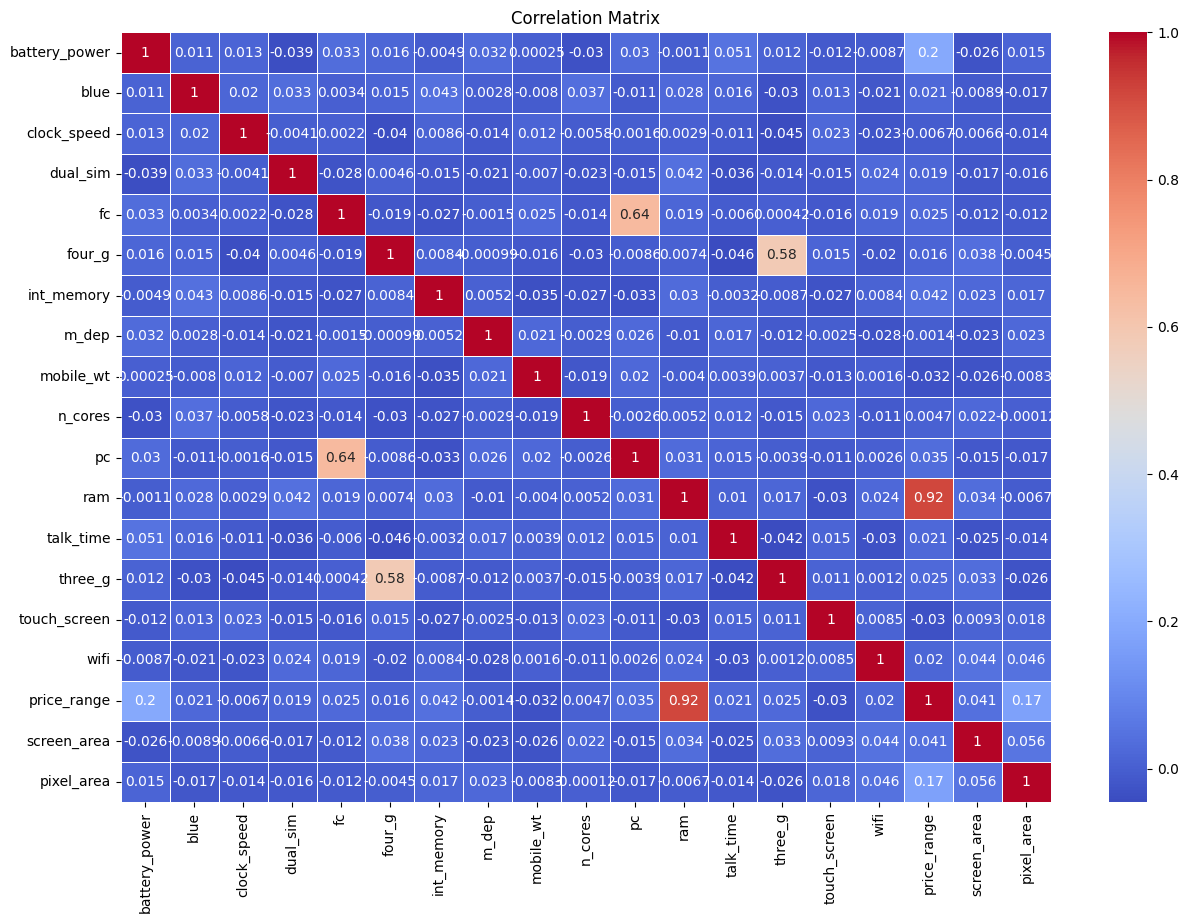

In [18]:
# Plot correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Key Observations**

1.  High Correlation with price_range:
*   Ram shows a very high correlation with price_range (0.92).
*   Other noticeable correlations with price_range include pixel_area (0.17)
*   battery_power (0.2), and screen_area (0.17).
2.  High Correlation Between Features:
*   fc and pc have a high correlation (0.64), indicating that these features might be redundant.
*   three_g and four_g show a moderate correlation (0.58).
3.   Low Correlation:
*   Many features have low or negligible correlations with price_range and each other, suggesting they may not provide much predictive power.



In [19]:
# Drop features with high multicollinearity
train_df = train_df.drop(columns=['fc'])  # Dropping 'fc' as it is highly correlated with 'pc'
test_df = test_df.drop(columns=['fc'])

In [20]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'screen_area',
       'pixel_area'],
      dtype='object')

In [21]:
#correlation matrix for the target and the features
corr_matrix=train_df.corr()
target_corr_list = corr_matrix["price_range"].sort_values(ascending=False)

In [22]:
#printing correlation matrix in descinding order
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(target_corr_list)

price_range      1.000000
ram              0.917448
battery_power    0.199277
pixel_area       0.174650
int_memory       0.041812
screen_area      0.041101
pc               0.034716
three_g          0.024896
blue             0.021330
talk_time        0.020511
wifi             0.019546
dual_sim         0.019108
four_g           0.015537
n_cores          0.004662
m_dep           -0.001396
clock_speed     -0.006675
touch_screen    -0.030315
mobile_wt       -0.032168
Name: price_range, dtype: float64


In [23]:
# Drop features with low Correlation (n_cores :0.004662 ,m_dep :-0.001396 ,clock_speed:-0.006675)
train_df = train_df.drop(columns=['n_cores','m_dep','clock_speed'])
test_df = test_df.drop(columns=['n_cores','m_dep','clock_speed'])

#Step 2: Model Training


In [24]:
X = train_df.drop(columns=['price_range'])
y = train_df['price_range']

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

I am going to use 2 ways of evaluation the first showing Accuracy, Precision, Recall and F1-score ,second showing the confusion matrix to see if the model is efficient in all classes

## 1-RandomForestClassifier


In [26]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Predict on the validation set
y_pred = rf_model.predict(X_val)

Accuracy: 0.88, Precision: 0.88, Recall: 0.88, F1-score: 0.88


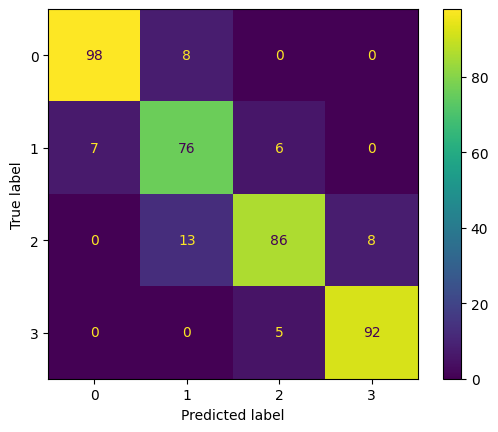

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)

precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot()

## 2-LogisticRegression

In [28]:
# Initialize the model
lr_model = LogisticRegression()
# Train the model
lr_model.fit(X_train, y_train)
# Predict on the validation set
y_pred = lr_model.predict(X_val)

Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1-score: 0.93


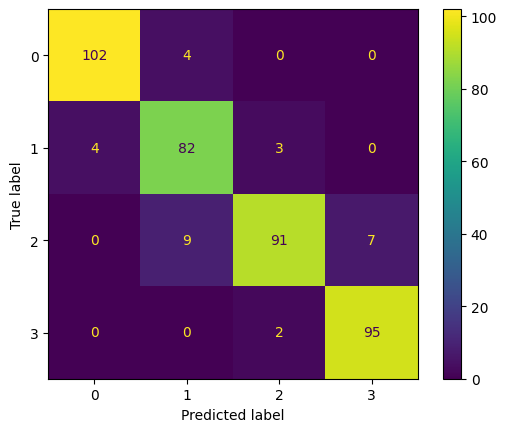

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)

precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lr_model.classes_)
disp.plot()

## 3-KNeighborsClassifier

In [30]:
# Initialize the model
knn_model = KNeighborsClassifier()
# Train the model
knn_model.fit(X_train, y_train)
# Predict on the validation set
y_pred = knn_model.predict(X_val)

Accuracy: 0.65, Precision: 0.67, Recall: 0.65, F1-score: 0.65


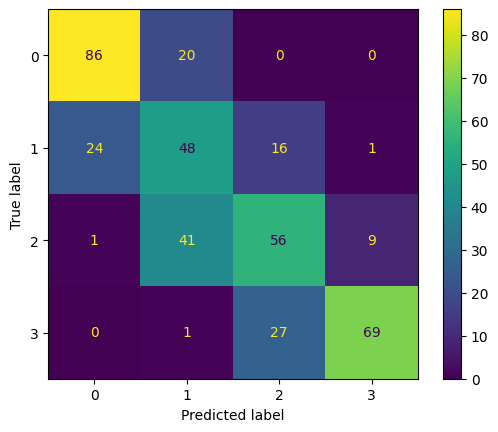

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)

precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot()

## 4-GradientBoostingClassifier

In [32]:
# Initialize the model
gb_model = GradientBoostingClassifier()
# Train the model
gb_model.fit(X_train, y_train)
# Predict on the validation set
y_pred = gb_model.predict(X_val)

Accuracy: 0.90, Precision: 0.90, Recall: 0.90, F1-score: 0.90


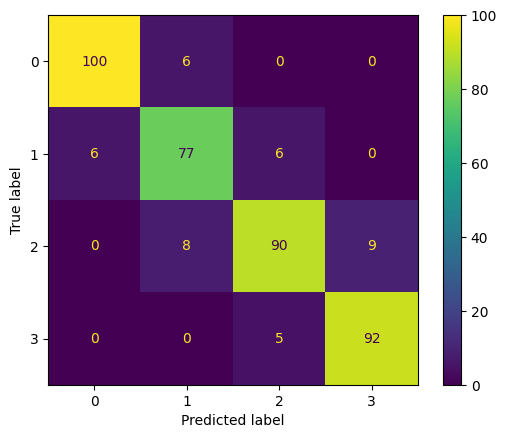

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)

precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_model.classes_)
disp.plot()

#Step 3: Model Optimization

The best model is LogisticRegression so the next approach is to optimize the model

In [34]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

In [35]:
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [36]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Accuracy: 0.93, Precision: 0.94, Recall: 0.93, F1-score: 0.93


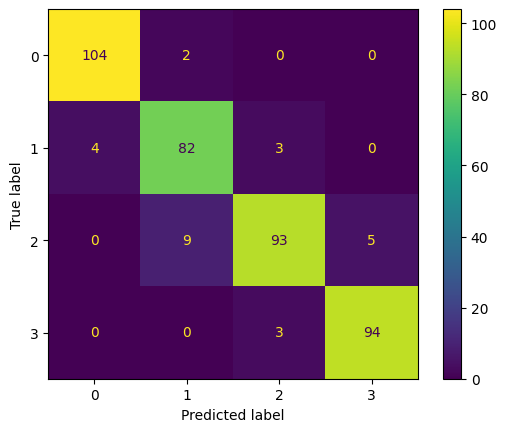

In [37]:
# Evaluate the model
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot()

#Step 4: Save the model

In [38]:
pickle.dump(best_model, open('finalized_model.pkl', 'wb'))